In [1]:
import nfl_data_py as nfl
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
years = list(iter(range(1999, 2025)))
all_data = nfl.import_weekly_data(years)

Downcasting floats.


In [3]:
all_data.recent_team.unique()

array(['MIA', 'CLE', 'TB', 'DAL', 'KC', 'WAS', 'NYG', 'CHI', 'NE', 'ATL',
       'NYJ', 'BAL', 'DEN', 'JAX', 'NO', 'CIN', 'DET', 'ARI', 'CAR', 'SF',
       'LAC', 'PIT', 'PHI', 'SEA', 'GB', 'LV', 'LA', 'TEN', 'MIN', 'BUF',
       'IND', 'HOU'], dtype=object)

In [4]:
all_data.position.unique()

array(['RB', 'QB', 'WR', 'TE', 'FB', 'P', 'LS', 'G', 'K', 'CB', 'DB',
       None, 'LB', 'T', 'MLB', 'FS', 'SS', 'C', 'ILB', 'OLB', 'DT', 'NT',
       'OG', 'OL', 'DE', 'OT', 'DL', 'S', 'HB'], dtype=object)

In [5]:
all_data.position_group.unique()

array(['RB', 'QB', 'WR', 'TE', 'SPEC', 'OL', 'DB', None, 'LB', 'DL'],
      dtype=object)

In [6]:
all_data.rename(columns={'recent_team':'team_abbrev'}, inplace=True)

all_data['team_abbrev'] = all_data['team_abbrev'].replace('LA', 'LAR')

In [7]:
coors = pd.read_csv('NFL_Teams_Coordinates.csv')

In [8]:
all_data = all_data.merge(coors, on=['team_abbrev'])
all_data.isnull().sum()

player_id                           0
player_name                     67380
player_display_name                 3
position                           72
position_group                     72
headshot_url                    59092
team_abbrev                         0
season                              0
week                                0
season_type                         0
opponent_team                       0
completions                         0
attempts                            0
passing_yards                       0
passing_tds                         0
interceptions                       0
sacks                               0
sack_yards                          0
sack_fumbles                        0
sack_fumbles_lost                   0
passing_air_yards                   0
passing_yards_after_catch           0
passing_first_downs                 0
passing_epa                    115272
passing_2pt_conversions             0
pacr                           115715
dakota      

In [9]:
all_data.columns

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'team_abbrev', 'season', 'week',
       'season_type', 'opponent_team', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_teams_tds', 'fantasy_points

In [10]:
team_yearly_agg = all_data[['team_abbrev','team_full_name', 'city', 'lat', 'lon', 'season','completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs',
       'passing_2pt_conversions', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs',
       'receiving_2pt_conversions', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr']].groupby(['team_abbrev','team_full_name', 'city', 'lat', 'lon','season']).sum().reset_index()

In [11]:
team_yearly_agg.columns

Index(['team_abbrev', 'team_full_name', 'city', 'lat', 'lon', 'season',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_2pt_conversions', 'carries',
       'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_2pt_conversions',
       'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr'],
      dtype='object')

In [17]:
mapplot = px.scatter_map(team_yearly_agg, lat='lat', lon='lon', zoom=2.25, hover_data=['team_abbrev', 'team_full_name', 'passing_yards', 'season'])

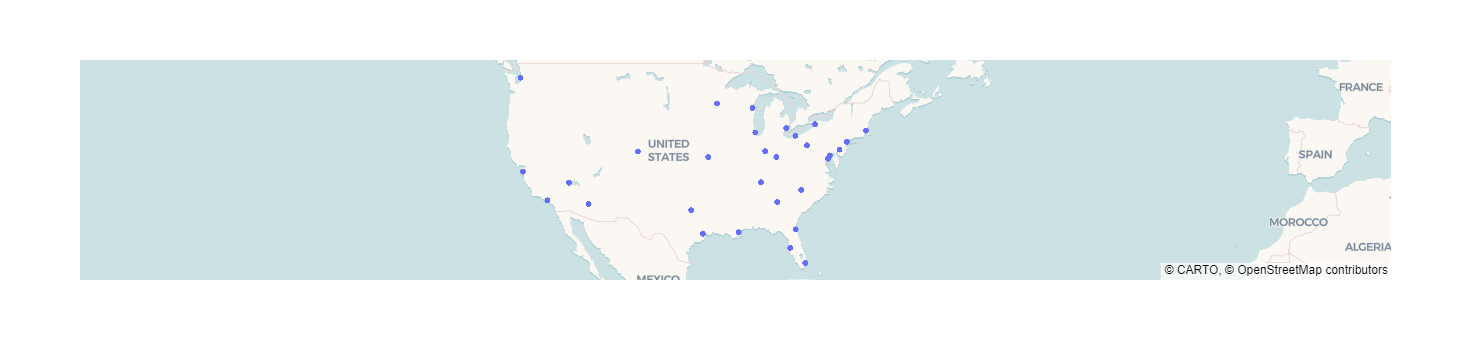

In [18]:
mapplot